# Facial Expression Recognition with CNN & Keras

This notebook demonstrates a complete pipeline for building a facial expression recognition system using the FER2013 dataset from Kaggle. It includes model training, evaluation, and real-time emotion detection from webcam.

In [2]:
#Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import os
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, BatchNormalization
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf

## 📂 Load and Prepare the FER2013 Dataset
Download `fer2013.csv` from Kaggle and place it in your working directory.

In [4]:
df = pd.read_csv("fer2013.csv")
print(df.head())
print(df['emotion'].value_counts())

emotion_labels = {
    0: "Angry",
    1: "Disgust",
    2: "Fear",
    3: "Happy",
    4: "Sad",
    5: "Surprise",
    6: "Neutral"
}

   emotion                                             pixels     Usage
0        0  70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...  Training
1        0  151 150 147 155 148 133 111 140 170 174 182 15...  Training
2        2  231 212 156 164 174 138 161 173 182 200 106 38...  Training
3        4  24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...  Training
4        6  4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...  Training
emotion
3    8989
6    6198
4    6077
2    5121
0    4953
5    4002
1     547
Name: count, dtype: int64


In [5]:
# ✅ Preprocess the pixel values and reshape
def process_pixels(pixels):
    pixels = np.array(pixels.split(), dtype='float32')
    pixels = pixels.reshape(48, 48, 1)
    return pixels / 255.0

df['pixels'] = df['pixels'].apply(process_pixels)
X = np.array(df['pixels'].tolist())
y = to_categorical(df['emotion'])

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 🧠 Build a Custom CNN Model

In [7]:
model = Sequential()
model.add(Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(48, 48, 1)))
model.add(BatchNormalization())
model.add(MaxPooling2D(2, 2))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(2, 2))
model.add(Dropout(0.3))

model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(2, 2))
model.add(Dropout(0.4))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(7, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

C:\Users\Aishwarya Anatha\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 48, 48, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 48, 48, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 24, 24, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 24, 24, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 24, 24, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 24, 24, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 12, 12, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 12, 12, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 9216)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     4,719,104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 7)              │         3,591 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,094,151 (19.43 MB)

 Trainable params: 5,093,255 (19.43 MB)

 Non-trainable params: 896 (3.50 KB)

## 🏋️‍♂️ Train the Model

In [9]:
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.15,
    height_shift_range=0.15,
    zoom_range=0.2,
    horizontal_flip=True
)

history = model.fit(datagen.flow(X_train, y_train, batch_size=64),
                    epochs=30,
                    validation_data=(X_test, y_test))

C:\Users\Aishwarya Anatha\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
449/449 ━━━━━━━━━━━━━━━━━━━━ 576s 1s/step - accuracy: 0.2139 - loss: 3.0775 - val_accuracy: 0.2467 - val_loss: 1.9599
Epoch 2/30
449/449 ━━━━━━━━━━━━━━━━━━━━ 512s 1s/step - accuracy: 0.2544 - loss: 1.8191 - val_accuracy: 0.2357 - val_loss: 1.7748
Epoch 3/30
449/449 ━━━━━━━━━━━━━━━━━━━━ 588s 1s/step - accuracy: 0.2676 - loss: 1.7831 - val_accuracy: 0.2549 - val_loss: 1.7720
Epoch 4/30
449/449 ━━━━━━━━━━━━━━━━━━━━ 587s 1s/step - accuracy: 0.2804 - loss: 1.7488 - val_accuracy: 0.3371 - val_loss: 1.6297
Epoch 5/30
449/449 ━━━━━━━━━━━━━━━━━━━━ 561s 1s/step - accuracy: 0.2991 - loss: 1.7065 - val_accuracy: 0.2871 - val_loss: 1.7444
Epoch 6/30
449/449 ━━━━━━━━━━━━━━━━━━━━ 556s 1s/step - accuracy: 0.3150 - loss: 1.6729 - val_accuracy: 0.3378 - val_loss: 1.6395
Epoch 7/30
449/449 ━━━━━━━━━━━━━━━━━━━━ 550s 1s/step - accuracy: 0.3203 - loss: 1.6519 - val_accuracy: 0.3678 - val_loss: 1.6180
Epoch 8/30
449/449 ━━━━━━━━━━━━━━━━━━━━ 559s 1s/step - accuracy: 0.3324 - loss: 1.6311 - val_accu

## 📈 Visualize Accuracy and Loss

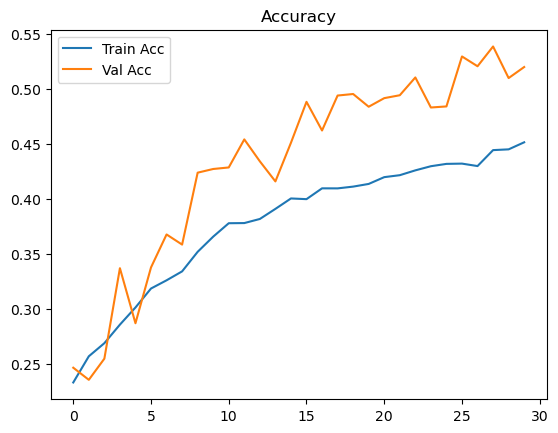

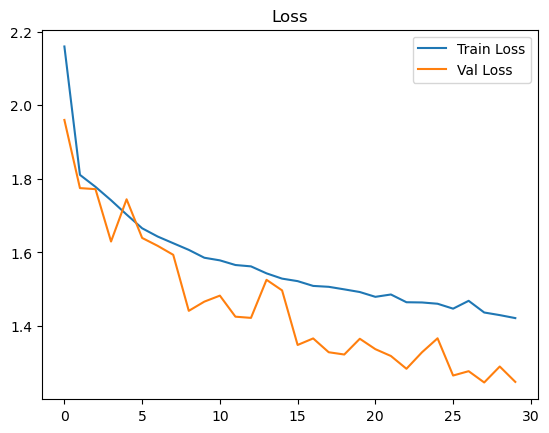

In [11]:
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.legend()
plt.title("Accuracy")
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.title("Loss")
plt.show()

## 🔍 Real-Time Webcam Emotion Detection

In [ ]:
def preprocess_face(face):
    face_gray = cv2.cvtColor(face, cv2.COLOR_BGR2GRAY)
    face_resized = cv2.resize(face_gray, (48, 48))
    face_normalized = face_resized.astype("float32") / 255.0
    face_input = np.expand_dims(np.expand_dims(face_normalized, -1), 0)
    return face_input

emotion_dict = emotion_labels
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")
cap = cv2.VideoCapture(0)

while True:
    ret, frame = cap.read()
    if not ret:
        break

    faces = face_cascade.detectMultiScale(frame, scaleFactor=1.3, minNeighbors=5)

    for (x, y, w, h) in faces:
        face = frame[y:y + h, x:x + w]
        input_face = preprocess_face(face)
        preds = model.predict(input_face)
        emotion = emotion_dict[np.argmax(preds)]

        cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0), 2)
        cv2.putText(frame, emotion, (x, y - 20), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (255, 0, 0), 2)

    cv2.imshow("Facial Expression Recognition", frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()